In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'svg'

In [2]:
import csv
import pandas

In this notebook, I investigate how far USCIS progresses with OPT applications over the course of two days.

# Data Reading

This is the same shebang as the other notebook [OPT I-765 Processing Time.ipynb](OPT I-765 Processing Time.ipynb).

In [11]:
data_eac_24 = pandas.read_csv('raw_data_240516/raw_data_eac.csv')
data_ysc_24 = pandas.read_csv('raw_data_240516/raw_data_ysc.csv')
data_24 = data_eac_24.append(data_ysc_24)

data_eac_26 = pandas.read_csv('raw_data_260516/raw_data_eac.csv')
data_ysc_26 = pandas.read_csv('raw_data_260516/raw_data_ysc.csv')
data_26 = data_eac_26.append(data_ysc_26)

In [12]:
data_24

,receipt,title,text
0,EAC1690120000,Case Was Transferred And A New Office Has Juri...,"On March 9, 2016, we transferred your Form I-7..."
1,EAC1690120001,Case Was Transferred And A New Office Has Juri...,"On March 9, 2016, we transferred your Form I-7..."
2,EAC1690120002,Case Was Transferred And A New Office Has Juri...,"On March 9, 2016, we transferred your Form I-7..."
3,EAC1690120003,Case Was Transferred And A New Office Has Juri...,"On March 11, 2016, we transferred your Form I-..."
4,EAC1690120004,Case Was Transferred And A New Office Has Juri...,"On March 9, 2016, we transferred your Form I-7..."
5,EAC1690120006,Case Was Transferred And A New Office Has Juri...,"On March 9, 2016, we transferred your Form I-7..."
6,EAC1690120007,Case Was Transferred And A New Office Has Juri...,"On March 9, 2016, we transferred your Form I-7..."
7,EAC1690120008,Case Was Transferred And A New Office Has Juri...,"On March 9, 2016, we transferred your Form I-7..."
8,EAC1690120009,Case Was Transferred And A New Office Has Juri...,"On March 9, 2016, we transferred your Form I-7..."
9,EAC1690120010,Case Was Transferred And A New Office Has Juri...,"On March 9, 2016, we transferred your Form I-7..."


In [13]:
data_26

,receipt,title,text
0,EAC1690120000,Case Was Transferred And A New Office Has Juri...,"On March 9, 2016, we transferred your Form I-7..."
1,EAC1690120001,Case Was Transferred And A New Office Has Juri...,"On March 9, 2016, we transferred your Form I-7..."
2,EAC1690120004,New Card Is Being Produced,"On May 25, 2016, we ordered your new card for ..."
3,EAC1690120005,Card Was Delivered To Me By The Post Office,"On May 26, 2016, the Post Office delivered you..."
4,EAC1690120006,New Card Is Being Produced,"On May 26, 2016, we ordered your new card for ..."
5,EAC1690120007,Case Was Transferred And A New Office Has Juri...,"On March 9, 2016, we transferred your Form I-7..."
6,EAC1690120010,New Card Is Being Produced,"On May 24, 2016, we ordered your new card for ..."
7,EAC1690120011,Case Was Transferred And A New Office Has Juri...,"On March 9, 2016, we transferred your Form I-7..."
8,EAC1690120012,Card Was Delivered To Me By The Post Office,"On May 13, 2016, the Post Office delivered you..."
9,EAC1690120013,Case Was Transferred And A New Office Has Juri...,"On March 9, 2016, we transferred your Form I-7..."


I can use this information to create a `status` for each receipt number. I'm using a lot of simplifying assupmtions here and disregarding a lot of corner cases (USCIS sometimes requests additional evidence, does weird thing with cases etc.) In fact, let's take a look at the vaious case `title`s:

In [14]:
data_26.groupby('title').count()['receipt']

title
Amended Notice Was Mailed                                                             5
Appeal Was Approved                                                                   1
Appeal Was Dismissed                                                                  8
Card Is Being Returned to USCIS by Post Office                                       12
Card Returned Undeliverable                                                           3
Card Was Delivered To Me By The Post Office                                       10890
Card Was Determined As Undeliverable By The Post Office                              23
Card Was Mailed To Me                                                              2761
Card Was Picked Up By The United States Postal Service                               81
Card Was Received By USCIS Along With My Letter                                       3
Card Was Returned And USCIS Is Holding It For One Year                               17
Card Was Returned To USCIS

# Sanity Check

I can check the differences in the `title` of the cases over the two days. This will give me some approximation of their progress. As you can see below, over two days, the number of approved / card in progress cases increased significantly while the number of still processing cases decreased.

In [31]:
case_status_24 = pandas.DataFrame(data_24.groupby('title').count()['receipt'])
case_status_24.columns = [24]
case_status_26 = pandas.DataFrame(data_26.groupby('title').count()['receipt'])
case_status_26.columns = [26]
case_status = case_status_24.merge(case_status_26, left_index=True, right_index=True)
case_status

,24,26
title,,
Amended Notice Was Mailed,8,5
Appeal Was Dismissed,9,8
Card Is Being Returned to USCIS by Post Office,10,12
Card Returned Undeliverable,4,3
Card Was Delivered To Me By The Post Office,11142,10890
Card Was Determined As Undeliverable By The Post Office,26,23
Card Was Mailed To Me,2022,2761
Card Was Picked Up By The United States Postal Service,161,81
Card Was Received By USCIS Along With My Letter,4,3


Generating statuses for the cases involve the same routine as the previous notebook [OPT I-765 Processing Time.ipynb](OPT I-765 Processing Time.ipynb).

In [36]:
def gen_status(row):
    if 'I-765' in row['text'] and 'Case Was Received' in row['title']:
        return 'processing'
    if 'I-765' in row['text'] and 'Case Was Transferred' in row['title']:
        return 'processing'
    if 'I-765' in row['text'] and 'Case Was Rejected' in row['title']:
        return 'rejected'
    if 'I-765' in row['text'] and 'Case Was Approved' in row['title']:
        return 'approved'
    if row['title'] == 'Card Was Delivered To Me By The Post Office':
        return 'approved'
    if row['title'] == 'New Card Is Being Produced':
        return 'approved'
    return ''

data_24['status'] = data_24.apply(gen_status, axis=1)
data_26['status'] = data_26.apply(gen_status, axis=1)

In [37]:
import re
import numpy
pattern = re.compile('On ([A-z]+ [0-9]+, [0-9]+),')

last_date = None
def extract_date(row):
    if row['status'] == 'processing':
        m = pattern.search(row['text'])
        global last_date
        last_date = numpy.datetime64(pandas.Timestamp(m.group(1)))
        return last_date
    return last_date

data_24['date'] = data_24.apply(extract_date, axis=1)
data_26['date'] = data_26.apply(extract_date, axis=1)

Our processed data looks like this:

In [38]:
data_24

,receipt,title,text,status,date
0,EAC1690120000,Case Was Transferred And A New Office Has Juri...,"On March 9, 2016, we transferred your Form I-7...",processing,2016-03-09
1,EAC1690120001,Case Was Transferred And A New Office Has Juri...,"On March 9, 2016, we transferred your Form I-7...",processing,2016-03-09
2,EAC1690120002,Case Was Transferred And A New Office Has Juri...,"On March 9, 2016, we transferred your Form I-7...",processing,2016-03-09
3,EAC1690120003,Case Was Transferred And A New Office Has Juri...,"On March 11, 2016, we transferred your Form I-...",processing,2016-03-11
4,EAC1690120004,Case Was Transferred And A New Office Has Juri...,"On March 9, 2016, we transferred your Form I-7...",processing,2016-03-09
5,EAC1690120006,Case Was Transferred And A New Office Has Juri...,"On March 9, 2016, we transferred your Form I-7...",processing,2016-03-09
6,EAC1690120007,Case Was Transferred And A New Office Has Juri...,"On March 9, 2016, we transferred your Form I-7...",processing,2016-03-09
7,EAC1690120008,Case Was Transferred And A New Office Has Juri...,"On March 9, 2016, we transferred your Form I-7...",processing,2016-03-09
8,EAC1690120009,Case Was Transferred And A New Office Has Juri...,"On March 9, 2016, we transferred your Form I-7...",processing,2016-03-09
9,EAC1690120010,Case Was Transferred And A New Office Has Juri...,"On March 9, 2016, we transferred your Form I-7...",processing,2016-03-09


In [39]:
data_26

,receipt,title,text,status,date
0,EAC1690120000,Case Was Transferred And A New Office Has Juri...,"On March 9, 2016, we transferred your Form I-7...",processing,2016-03-09
1,EAC1690120001,Case Was Transferred And A New Office Has Juri...,"On March 9, 2016, we transferred your Form I-7...",processing,2016-03-09
2,EAC1690120004,New Card Is Being Produced,"On May 25, 2016, we ordered your new card for ...",approved,2016-03-09
3,EAC1690120005,Card Was Delivered To Me By The Post Office,"On May 26, 2016, the Post Office delivered you...",approved,2016-03-09
4,EAC1690120006,New Card Is Being Produced,"On May 26, 2016, we ordered your new card for ...",approved,2016-03-09
5,EAC1690120007,Case Was Transferred And A New Office Has Juri...,"On March 9, 2016, we transferred your Form I-7...",processing,2016-03-09
6,EAC1690120010,New Card Is Being Produced,"On May 24, 2016, we ordered your new card for ...",approved,2016-03-09
7,EAC1690120011,Case Was Transferred And A New Office Has Juri...,"On March 9, 2016, we transferred your Form I-7...",processing,2016-03-09
8,EAC1690120012,Card Was Delivered To Me By The Post Office,"On May 13, 2016, the Post Office delivered you...",approved,2016-03-09
9,EAC1690120013,Case Was Transferred And A New Office Has Juri...,"On March 9, 2016, we transferred your Form I-7...",processing,2016-03-09


# Results

Now I have two time series. I can easily read off the progress that USCIS made over two days.

In [40]:
data_24 = data_24.drop_duplicates(subset='receipt')
data_26 = data_26.drop_duplicates(subset='receipt')

In [41]:
result = pandas.DataFrame()
result['processing_24'] = data_24[data_24['status'] == 'processing'].groupby('date')['receipt'].count()
result['approved_24'] = data_24[data_24['status'] == 'approved'].groupby('date')['receipt'].count()
result['rejected_24'] = data_24[data_24['status'] == 'rejected'].groupby('date')['receipt'].count()
result['processing_26'] = data_26[data_26['status'] == 'processing'].groupby('date')['receipt'].count()
result['approved_26'] = data_26[data_26['status'] == 'approved'].groupby('date')['receipt'].count()
result['rejected_26'] = data_26[data_26['status'] == 'rejected'].groupby('date')['receipt'].count()
result.columns = ['Processing 24/5', 'Approved 24/5', 'Rejected 24/5', 'Processing 26/5', 'Approved 26/5', 'Rejected 26/5']

First I see that the number of processing cases increased somewhat over the April period. This is expected -- people would have fixed up their broken applications. These are the people with insufficient / incorrect evidence (remeber some of the case status being "requiring more evidence" or something of that sort?). These cases would have been converted to in-progress cases.

On the other hand, the number of processing cases over the March period significantly decreased, again consistent with what I would expect.

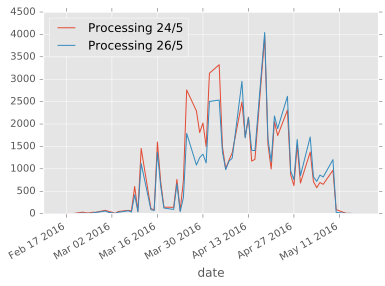

In [42]:
result[['Processing 24/5', 'Processing 26/5']].plot()

The number of approved cases went up somewhat for the March period, consistent with the fall for in-progress cases.

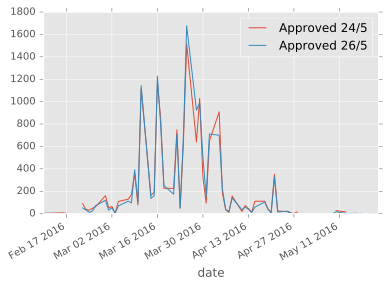

In [49]:
result[['Approved 24/5', 'Approved 26/5']].plot()

In [44]:
result.loc['2016-03-30']

Processing 24/5    2022.0
Approved 24/5       324.0
Rejected 24/5         9.0
Processing 26/5    1327.0
Approved 26/5       502.0
Rejected 26/5         6.0
Name: 2016-03-30 00:00:00, dtype: float64

I can do the same for the "Approved Proportion" metric used in the previous notebook [OPT I-765 Processing Time.ipynb](OPT I-765 Processing Time.ipynb). This shows that USCIS did make significant progress over two days.

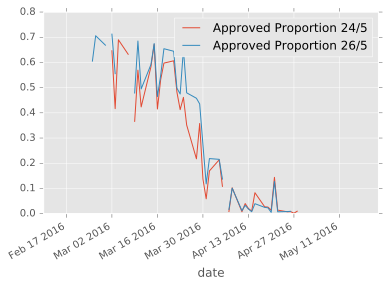

In [45]:
result['Approved Proportion 24/5'] = result['Approved 24/5'] / (result['Processing 24/5'] + result['Approved 24/5'] + result['Rejected 24/5'])
result['Approved Proportion 26/5'] = result['Approved 26/5'] / (result['Processing 26/5'] + result['Approved 26/5'] + result['Rejected 26/5'])
result[['Approved Proportion 24/5', 'Approved Proportion 26/5']].plot()